## Importing Libraries

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from sklearn.manifold import TSNE
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

In [3]:
class Linear(keras.layers.Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      # self.w1 = self.add_weight(shape=(input_shape[-1], self.units),
      #                          initializer='random_normal',
      #                          trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(tf.pow(inputs, 2), self.w) + tf.matmul(inputs, self.w) + self.b  

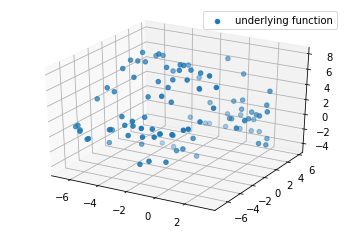

In [4]:
bias_true = tf.constant([1,-1],dtype=tf.dtypes.float32)
x = tf.random.uniform(shape=[100,3], minval=-1., maxval=0.,dtype=tf.dtypes.float32)
weights_1 = tf.transpose(tf.constant([[1, 1,0],[1,0,1]],dtype=tf.dtypes.float32))
weights_2 = tf.transpose(tf.constant([[0,0,1],[0,1,0]],dtype=tf.dtypes.float32))
y_true = tf.matmul(x , weights_1) +  tf.matmul(x , weights_2) + bias_true
X_embedded = TSNE(n_components=2).fit_transform(x)
y_embedded = TSNE(n_components=1).fit_transform(y_true)

plot_3d(X_embedded, y_embedded)


In [5]:
class MLP(keras.Model):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(3)
        self.linear_2 = Linear(10)
        self.linear_3 = Linear(2)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

mlp = MLP()
y = mlp(x)

Epoch 1/10
4/4 [==============================] - 3s 15ms/step - loss: 3.5772
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 3.0670
Epoch 3/10
4/4 [==============================] - 0s 25ms/step - loss: 2.6321
Epoch 4/10
4/4 [==============================] - 0s 26ms/step - loss: 2.2399
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 1.9069
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 1.6481
Epoch 7/10
4/4 [==============================] - 0s 9ms/step - loss: 1.4081
Epoch 8/10
4/4 [==============================] - 0s 8ms/step - loss: 1.2213
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 1.0379
Epoch 10/10
4/4 [==============================] - 0s 14ms/step - loss: 0.8755


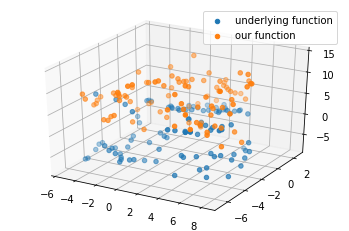

In [6]:
mlp.compile(loss='mse', optimizer=optimizers.SGD(0.02))
mlp.fit(x, y_true, epochs=10)
X_embedded = TSNE(n_components=2).fit_transform(x)
y_embedded = TSNE(n_components=1).fit_transform(y_true)
y_pred= mlp(x)
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)
plot_3d(X_embedded, y_embedded,y_pred_embedded)

### With Dense layers from Keras

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 regression (Dense)          (None, 2)                 14        
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
4/4 [==============================] - 1s 7ms/step - loss: 2.9534
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 2.4399
Epoch 3/10
4/4 [====================

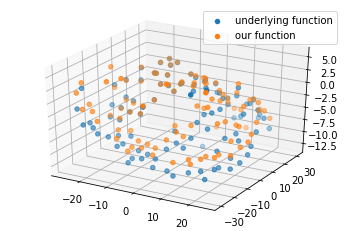

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

bias_true = tf.constant([1,-1],dtype=tf.dtypes.float32)
x = tf.random.uniform(shape=[100,3], minval=-1., maxval=0.,dtype=tf.dtypes.float32)
weights_1 = tf.transpose(tf.constant([[1, 1,0],[1,0,1]],dtype=tf.dtypes.float32))
weights_2 = tf.transpose(tf.constant([[0,0,1],[0,1,0]],dtype=tf.dtypes.float32))
y_true = tf.matmul(x , weights_1) +  tf.matmul(x , weights_2) + bias_true
X_embedded = TSNE(n_components=2).fit_transform(x)
y_embedded = TSNE(n_components=1).fit_transform(y_true)

#plot_3d(X_embedded, y_embedded)

# input layer has 3 neurons for 3 dimensional input
inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
l2 = layers.Dense(6, activation='relu', name='dense_2')(l1)
# output layer has 2 neurons 
outputs = layers.Dense(2, name='regression')(l2)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.02))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

X_embedded = TSNE(n_components=2).fit_transform(x)
y_embedded = TSNE(n_components=1).fit_transform(y_true)
y_pred= model(x)
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)
plot_3d(X_embedded, y_embedded,y_pred_embedded)